<a href="https://colab.research.google.com/github/Snorlaksh/Information-transfer-in-Gene-Expression/blob/main/Information_Transfer_in_Gene_Expression_using_Information_Theory.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Entropy & Mutual Information**

Suppose the inputs are drawn from some distribution $P(c)$ and fed into a system which responds with appropriate g. These pairs of input/output are distributed jointly according to
\begin{align*}
P(c,g) = P(g|c)P(c)
\end{align*}
We are interested in finding out how strongly the inputs($c$) and outputs($g$) are dependent on each other.

As long as there is some statistical relation between $c$ & $g$, we want to find a measure that would quantify "how much" one can know.

Quantity used to measure intedependency is **Covariance**.
\begin{align*}
Cov(c,g) = \int dc \int dg(c-\bar{c})(g-\bar{g})P(c,g)
\end{align*}
Covariance & Correlation tells us if the variables are linearly related but there are many possible non linear, multimodal, or complex relationships that covariance does not detect.

For example, if a protein’s response to a transcription factor is periodic or has a threshold-like behavior, correlation might be near zero even though a strong dependency exists.

Mutual information, on the other hand, captures all types of dependencies—linear or nonlinear—by quantifying how much knowing one variable reduces uncertainty about the other. It provides a more complete picture of the statistical dependency between input (TF concentration) and output (protein concentration), even in cases where traditional measures fail.

Entropy in microcanonical ensemble is defined as the number of accessible states in an isolated system at fixed energy, pressure, and particle number. In this case, we can say that probability of finding any state is eqaully likely.

**Entropy just counts the number of states**, $S = k_{B}Tlog_{2}M$. Here, $M$ represents the number of states in thst system. Entropy in other ensembles can be calculated via Legendre Transform.

In Canonical Ensemble, we allow the energy to fluctuate, keeping mean energy fixed. This leads the system to be in many energy stated itself with different probabilities. So, we define the canonical entropy: $S = -\sum_{i} p_{i}*log_{2}p_{i}$. This is known as **Shannon Entropy**.

By convention, we chose the units where $k_{B}T = 1$. $log_{2}$ defines a unit called a **bit**.

For $M$ equally probable states, $S = log_{2} M$.

Entropy is always positive, measured in bits, and in discrete case, taken as a value between 2 limits: $0 \leq S[P] \leq log_{2} M$. Entropy is 0 when the distribution has its whole weight of 1 concentrated at a single $i$. The entropy is maximal when the distribution is Uniform.

For continuous distributions, S = $-\int d\vec{c}p(\vec{c})log_{2} p(\vec{c})$

Entropy can't be measured directly.

For a cell with concentration c of proteins that fluctuate around its mean $\bar{c}$ and has a width $\sigma_{c}$,
\begin{align*}
P(c) = \frac{1}{\sqrt{2\pi\sigma_{c}^{2}}}e^{-\frac{(c-\bar{c})^{2}}{2\sigma_{c}^{2}}}
\end{align*}
\begin{align*}
S[P(c)] = log_{2} \sqrt{2\pi e\sigma_{c}^{2}}
\end{align*}
Key Observations:
1. Entropy doesn't depend on mean.
2. Entropy depends on choice of units.(reflection of the fact that c is a continuous variable)

Mutual Information (MI) is a measure from information theory that quantifies how much information one random variable contains about another. In our context, it tells us how much knowing the transcription factor concentration $c$ reduces uncertainty about the gene expression $g$.

Mathematically, mutual information between two discrete random variables c and g is defined as:
\begin{align*}
I(c; g) = \sum_{c,g} P(c, g) \log_2\frac{P(c, g)}{P(c)P(g)}
\end{align*}
For continuous distributions, $I(c;g) = \int dc \int dg P(c,g) log_{2} \frac{P(c,g)}{P(c)P(g)}$

This measures how far the joint distribution $P(c,g)$ is from the product of the marginal distributions $P(c)P(g)$. If Joint distribution of inputs and outputs are independent, then, $P(c,g) = P(c)P(g)$ and $I(c;g) = 0$. So, Entropy of system would be sum of individual entropies.

Another equivalent form, useful in the context of communication and biological signaling, is:
\begin{align*}
I(c;g) = \int dc P(c)(S[P(g)] - S[P(g|c)])
\end{align*}
where $S[P(g)]$ is the entropy (uncertainty) of $g$, and $S[P(g|c)]$ is the average entropy of $g$ given $c$. This expression emphasizes that mutual information is the reduction in uncertainty about $g$ after knowing $c$.

Mutual Information is a symmetric quantity.

If variables are not independent, then entropy of system is reduced by mutual information: $I(c;g) = S[P(c)] + S[P(g)] - S[P(c,g)]$

**Properties of Mutual Information**

1. It can be defined for both continuous & discrete quantities.

2. It is reparametrization invariant.

3. It obeys data processing inequality.

4. It has a clear interpretation.

**Channel Capacity** is defined as the maximum amount of mutual information that can be transferred. It sets a limit on how much information can be reliably transmitted through a noisy system.

# **Blahut Arimoto Algorithm**

# **Unconstrained Channel**

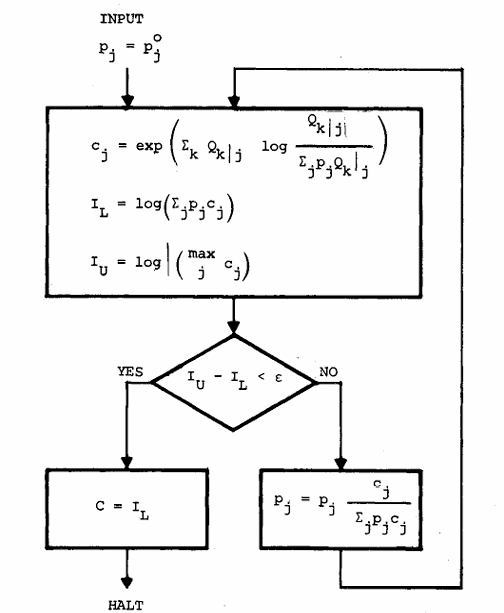

# **Computing Mutual Information when noise is additive and both noise & input obey gaussian distribution**

It is generally not true in Biological Systems.

We consider the model:
$g = c + \eta$ ($\eta$ is noise)

where $c \sim \mathcal{N}(c, \sigma_c^2)$ and $\eta \sim \mathcal{N}(\mu, \sigma^2)$ are independent Gaussians.

The conditional distribution of $g$ given $c$ is:
$P(g|c) = P(\eta) = \frac{1}{\sqrt{2\pi\sigma^2}} e^{-\frac{(g - c)^2}{2\sigma^2}}$

The marginal distribution of $c$ is:
$P(c) = \frac{1}{\sqrt{2\pi\sigma_c^2}} e^{-\frac{(c - \bar{c})^2}{2\sigma_c^2}}$

Since $c$ and $\eta$ are independent Gaussians, the variance of $g$ is:
$\text{Var}(g) = \text{Var}(c) + \text{Var}(\eta) = \sigma_c^2 + \sigma^2$

The entropy of a Gaussian variable is:
$S(P(g)) = \log_2 \sqrt{2\pi e (\sigma_c^2 + \sigma^2)}$

Similarly, the entropy of the conditional distribution is:
$S(P(g|c)) = \log_2 \sqrt{2\pi e \sigma^2}$

Hence, the mutual information is:
\begin{align*}
I(c; g) &= \int dc P(c)[S(P(g)) - S(P(g|c))] \\
&= \int dc P(c)[\log_2 \left( \sqrt{2\pi e (\sigma_c^2 + \sigma^2)} \right) - \log_2 \left( \sqrt{2\pi e \sigma^2} \right)] \\
&= \frac{1}{2} \log_2 \left( \frac{\sigma_c^2 + \sigma^2}{\sigma^2} \right) \int dc P(c)\\
&= \frac{1}{2} \log_2 \left( 1 + \frac{\sigma_c^2}{\sigma^2} \right)
\end{align*}

Here, **$\frac{\sigma_c^{2}}{\sigma^{2}}$** is defined as the **Signal-to-Noise Ratio(SNR)**.

# **Computing Channel Capacity for the same**

We want to maximize the entropy:
$f(c) = -P(c) \log P(c)$
subject to the following constraints:
\begin{align*}
&\int P(c) \, dc = 1 \quad \text{(normalization)} \\
&\int c P(c) \, dc = \mu \quad \text{(mean)} \\
&\int c^2 P(c) \, dc = \mu^2 + \sigma^2 \quad \text{(second moment)}
\end{align*}

We define the Lagrangian:
$\mathcal{L}[P(c)] = -P(c) \log P(c) - \lambda_0(\int P(c) \, dc - 1) - \lambda_1 ( \int c P(c) \, dc - \mu)
- \lambda_2 ( \int c^2 P(c) \, dc - (\mu^2 + \sigma^2))$

Taking the functional derivative:
$\frac{d\mathcal{L}[P(c)]}{dP(c)} = -\log P(c) - 1 - \lambda_0 - \lambda_1 c - \lambda_2 c^2$

Set the derivative to zero for optimization:
$\frac{d\mathcal{L}}{dP(c)} = 0 \Rightarrow -\log P(c) - 1 - \lambda_0 - \lambda_1 c - \lambda_2 c^2 = 0$

Solving for $P(c)$:
\begin{align*}
log P(c) = -1 - \lambda_0 - \lambda_1 c - \lambda_2 c^2
\end{align*}
\begin{align*}
P(c) = e^{-1 - \lambda_0 - \lambda_1 c - \lambda_2 c^2}
\end{align*}
This can be written as:
$P(c) = Z^{-1} e^{-\lambda_2 ( c + \frac{\lambda_1}{2 \lambda_2})^2}$, where $Z^{-1} = e^{-1-\lambda_{0}+\frac{\lambda_1^{2}}{4\lambda_{2}}}$

Comparing with the Gaussian form:
$P(c) = \frac{1}{\sqrt{2\pi \sigma_c^2}} e^{-\frac{(c - \bar{c})^2}{2\sigma_c^2}}$

we find:
$\bar{c} = -\frac{\lambda_1}{2\lambda_2}, \quad \sigma_c^2 = \frac{1}{2\lambda_2}$

The mutual information (i.e., the channel capacity) is:
$I(c; g) = \frac{1}{2} \log_2(1 + \frac{\sigma_c^2}{\sigma^2})$.

From the Lagrange multiplier method, we obtained the optimal input variance:
$\sigma_c^2 = \frac{1}{2\lambda_2}$

Substituting this into the capacity expression, we find:
$I(c; g) = \frac{1}{2} \log_2(1 + \frac{1}{2\lambda_2 \sigma^2})$

# **Models**

# **Doing for Matrix given in Arimoto's Original Paper**

In [1]:
import numpy as np

def channelcapacity(Q_kj, tolerance = 1e-10, max_iterations = 10000000):

    epsilon = 1e-15

    num_inputs, num_outputs = Q_kj.shape

    p_j = np.full(num_inputs, 1.0 / num_inputs) #np.full(shape, input)

    for iteration in range(max_iterations):
        p_k = np.maximum(p_j @ Q_kj,epsilon)

        Q = np.maximum(Q_kj,epsilon)

        c_k = np.sum(Q*np.log(Q/p_k), axis = 1)
        c_k = np.clip(c_k, -700, 700)  # Avoid overflow in exp

        c_j = np.exp(c_k)

        I_L = np.log(p_j @ c_j)
        I_L = I_L/np.log(2)

        I_U = np.log(np.max(c_j))
        I_U = I_U/np.log(2)

        if I_U - I_L < tolerance:
            print(f"Converged in {iteration+1} iterations. Channel Capacity = {I_L} bits")
            return I_L, p_j, iteration+1

        numerator = p_j * c_j
        denominator = np.sum(numerator)
        p_j = numerator/denominator

        if denominator < epsilon:
            print("Numerical underflow in normalization step")
            return None

    print("Did not converge within the maximum number of iterations.")
    return None

In [2]:
Q_jk = [[0.6, 0.7, 0.5],[0.3, 0.1, 0.05],[0.1, 0.2, 0.45]]

I_L, p_j, iterations = channelcapacity(np.array(Q_jk).T)  # Transpose needed
print("Optimal P(c) distribution: ", p_j)

Converged in 311 iterations. Channel Capacity = 0.16163186086532857 bits
Optimal P(c) distribution:  [5.01735451e-01 1.03371235e-09 4.98264548e-01]


# **g = hill(c) + noise**

In [3]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


#mu = 5.0


num_inputs = 1000
num_outputs = 1000

c_vals = np.logspace(-2, np.log10(2), num_inputs)
g_vals = np.linspace(0, 1, num_outputs)


K = 1.0
n = 5.0

R = 5.0
tau = 1.0
k_minus = 1.0
D = 1.0
a = 1.0

def hill(c):
    return c**n/(c**n + K**n)



# def noise(c):                                               # Can be used instead of constant noise sigma but jeffreys prior is applicable only when noise is constant
#     term_1 = hill(c)/(R*tau)**2
#     term_2 = hill(c)*(1-hill(c))**2/k_minus*tau
#     term_3 = (hill(c)*(1-hill(c)))**2/D*a*c*tau
#     sigma_n = term_1 + term_2 + term_3
#     return sigma_n

# Constant Noise

sigma = 0.002


#Defining the Channel Transition Matrix

def chantransmat(c_vals, g_vals):
    delta_g = g_vals[1] - g_vals[0]
    Q_kj = np.zeros((num_outputs, num_inputs))
    for j, c in enumerate(c_vals):
        for k, g in enumerate(g_vals):
            Q_kj[k,j] = norm.pdf(g, loc=hill(c), scale=sigma) * delta_g
    column_sums = Q_kj.sum(axis=0, keepdims=True)
    column_sums[column_sums < 1e-15] = 1.0  # prevent division by 0
    Q_kj /= column_sums
    return Q_kj



# Applying Blahut Arimoto Algorithm

def channelcapacity(Q_kj, tolerance = 1e-3, max_iterations = 1000000):

    epsilon = np.finfo(float).tiny

    num_outputs, num_inputs = Q_kj.shape


    p_j = np.full(num_inputs, 1.0 / num_inputs)    #np.full(shape, value)
    p_j /= np.sum(p_j)  # Normalize


    for iteration in range(max_iterations):
        p_k = np.sum(Q_kj * p_j, axis=1)
        p_k = np.maximum(p_k,epsilon)

        Q = np.maximum(Q_kj,epsilon)

        c_k = np.sum(Q * np.log(Q / p_k[:, None]), axis=0)
        c_k = np.clip(c_k, -700, 700)  # Avoid overflow in exp

        c_j = np.exp(c_k)

        I_L = np.log(np.sum(p_j * c_j))
        I_L = I_L/np.log(2)

        I_U = np.log(max(c_j))
        I_U = I_U/np.log(2)


        if iteration % 10 == 0:
            print(f"Iter {iteration}: I_L = {I_L:.4f}, I_U = {I_U:.4f}")

        if abs(I_U - I_L) < tolerance:
            print(f"Converged in {iteration+1} iterations. Channel Capacity = {I_L} bits")
            return I_L, p_j, iteration+1

        p_j = p_j * c_j
        p_j /= np.sum(p_j)

        if np.any(p_j < epsilon):
            print("Numerical underflow in normalization step")
            return None, None, iteration+1

    print("Did not converge within the maximum number of iterations.")
    return None, None, iteration+1

In [4]:
Q = chantransmat(c_vals, g_vals)
I, p_opt, iters = channelcapacity(Q)

Iter 0: I_L = 6.8686, I_U = 9.6073
Iter 10: I_L = 6.8729, I_U = 6.9165
Iter 20: I_L = 6.8731, I_U = 6.8981
Iter 30: I_L = 6.8732, I_U = 6.8907
Iter 40: I_L = 6.8732, I_U = 6.8861
Iter 50: I_L = 6.8733, I_U = 6.8832
Iter 60: I_L = 6.8733, I_U = 6.8814
Iter 70: I_L = 6.8733, I_U = 6.8801
Iter 80: I_L = 6.8733, I_U = 6.8792
Iter 90: I_L = 6.8733, I_U = 6.8786
Iter 100: I_L = 6.8733, I_U = 6.8781
Iter 110: I_L = 6.8733, I_U = 6.8778
Iter 120: I_L = 6.8733, I_U = 6.8775
Iter 130: I_L = 6.8733, I_U = 6.8772
Iter 140: I_L = 6.8733, I_U = 6.8770
Iter 150: I_L = 6.8733, I_U = 6.8768
Iter 160: I_L = 6.8733, I_U = 6.8766
Iter 170: I_L = 6.8733, I_U = 6.8764
Iter 180: I_L = 6.8733, I_U = 6.8763
Iter 190: I_L = 6.8733, I_U = 6.8762
Iter 200: I_L = 6.8733, I_U = 6.8760
Iter 210: I_L = 6.8733, I_U = 6.8759
Iter 220: I_L = 6.8733, I_U = 6.8758
Iter 230: I_L = 6.8733, I_U = 6.8757
Iter 240: I_L = 6.8733, I_U = 6.8756
Iter 250: I_L = 6.8733, I_U = 6.8756
Iter 260: I_L = 6.8733, I_U = 6.8755
Iter 270: I_

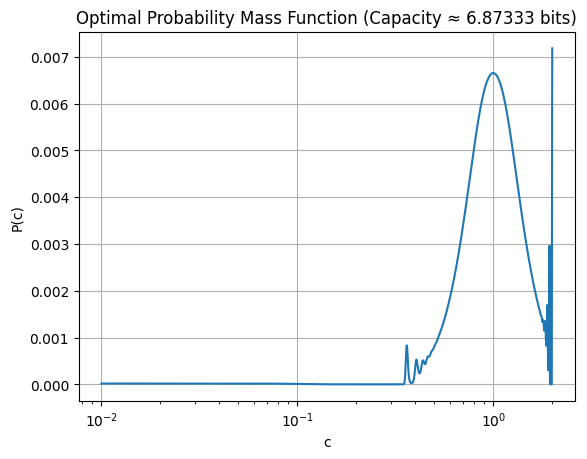

In [5]:
plt.plot(c_vals, p_opt)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal Probability Mass Function (Capacity ≈ {I:.5f} bits)")
plt.grid(True)
plt.show()

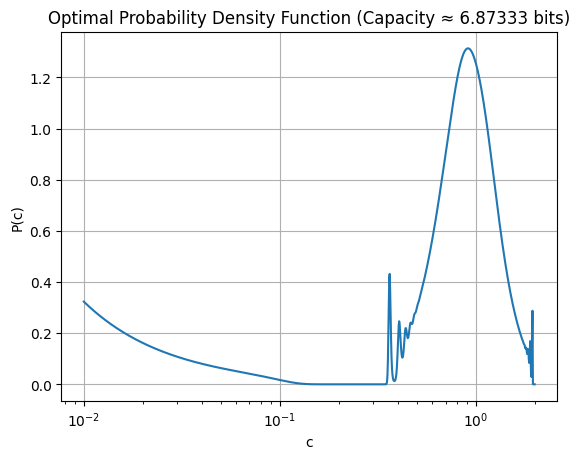

In [6]:
delta_cs = np.diff(c_vals)

p_pd = p_opt[:-1]/delta_cs

c_mids = (c_vals[:-1] + c_vals[1:]) / 2

plt.plot(c_mids, p_pd)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal Probability Density Function (Capacity ≈ {I:.5f} bits)")
plt.grid(True)
plt.show()

In [7]:
# Checking for Normalization
from scipy.integrate import simpson

k = simpson(p_pd, c_mids)
k

np.float64(0.9932829344405537)

/tmp/ipython-input-8-3344462263.py:9: DeprecationWarning: `trapz` is deprecated. Use `trapezoid` instead, or one of the numerical integration functions in `scipy.integrate`.
  area = np.trapz(Jp_values, c_mids)


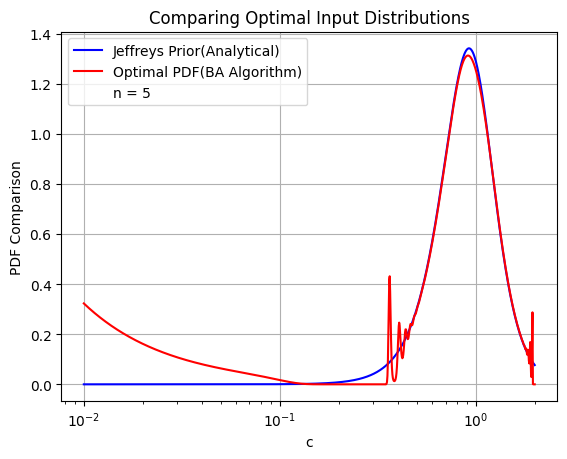

In [8]:
# Computing Jeffreys Prior and checking if it matches with BA Optimal Probability Density Function

Jp_values=[]
for c in c_mids:
    Jp = (n * c**(n - 1) * K**n) / (((K**n + c**n)**2)*sigma)
    Jp_values.append(Jp)

Jp_values = np.array(Jp_values)
area = np.trapz(Jp_values, c_mids)
Jp_values /= area


plt.plot(c_mids, Jp_values,color='blue', label='Jeffreys Prior(Analytical)')
plt.plot(c_mids, p_pd, color='red', label='Optimal PDF(BA Algorithm)')
plt.plot([], [], ' ', label="n = 5")
plt.title("Comparing Optimal Input Distributions")
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("PDF Comparison")
plt.legend()
plt.grid(True)
plt.show()

In [9]:
# Checking for Normalization
Kl = simpson(Jp_values, c_mids)
Kl

np.float64(0.9999980793793097)

# Jeffreys Prior matches here, so we can say that our code is correct.

# **For Input Dependent Noise**

In [10]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


#mu = 5.0


num_inputs = 1000
num_outputs = 1000

c_vals = np.logspace(-2, np.log10(2), num_inputs)
g_vals = np.linspace(0, 1, num_outputs)


K = 1.0
n = 5.0

R = 5.0
tau = 1.0
k_minus = 1.0
D = 1.0
a = 1.0



def mean(c):
    return c**n/(c**n + K**n)



# Defining the Input Dependent Noise Function

def noise(c):
    h = mean(c)
    term_1 = h/(R*tau)**2
    term_2 = (h/R*tau)*(1-(h/R*tau))**2/k_minus*tau
    term_3 = ((h/R*tau)*(1-(h/R*tau)))**2/(D*a*c*tau)
    sigma_n = term_1 + term_2 + term_3
    return sigma_n

# sigma = 0.02

# Defining the Channel Transition Matrix

def chantransmat(c_vals, g_vals):
    delta_g = g_vals[1] - g_vals[0]
    Q_kj = np.zeros((num_outputs, num_inputs))
    for j, c in enumerate(c_vals):
        for k, g in enumerate(g_vals):
            h = mean(c)
            Q_kj[k,j] = norm.pdf(g, loc=h, scale=noise(c)) * delta_g
    column_sums = Q_kj.sum(axis=0, keepdims=True)
    column_sums[column_sums < 1e-15] = 1.0  # prevent division by 0
    Q_kj /= column_sums
    return Q_kj


# Applying the Blahut-Arimoto Algorithm

def channelcapacity(Q_kj, tolerance = 1e-3, max_iterations = 100000):

    epsilon = np.finfo(float).tiny

    num_outputs, num_inputs = Q_kj.shape


    p_j = np.full(num_inputs, 1.0 / num_inputs)    #np.full(shape, value)
    p_j /= np.sum(p_j)  # Normalize


    for iteration in range(max_iterations):
        p_k = np.sum(Q_kj * p_j, axis=1)
        p_k = np.maximum(p_k,epsilon)

        Q = np.maximum(Q_kj,epsilon)

        c_k = np.sum(Q * np.log(Q / p_k[:, None]), axis=0)
        c_k = np.clip(c_k, -700, 700)  # Avoid overflow in exp

        c_j = np.exp(c_k)

        I_L = np.log(np.sum(p_j * c_j))
        I_L = I_L/np.log(2)

        I_U = np.log(max(c_j))
        I_U = I_U/np.log(2)


        if iteration % 10 == 0:
            print(f"Iter {iteration}: I_L = {I_L:.4f}, I_U = {I_U:.4f}")

        if abs(I_U - I_L) < tolerance:
            print(f"Converged in {iteration+1} iterations. Channel Capacity = {I_L} bits")
            return I_L, p_j, iteration+1

        p_j = p_j * c_j
        p_j /= np.sum(p_j)

        if np.any(p_j < epsilon):
            print("Numerical underflow in normalization step")
            return None, None, iteration+1

    print("Did not converge within the maximum number of iterations.")
    return None, None, iteration+1

In [11]:
Q = chantransmat(c_vals, g_vals)
I, p_opt, iters = channelcapacity(Q)

Iter 0: I_L = 3.1051, I_U = 4.7837
Iter 10: I_L = 3.1394, I_U = 3.2176
Iter 20: I_L = 3.1448, I_U = 3.1903
Iter 30: I_L = 3.1471, I_U = 3.1794
Iter 40: I_L = 3.1485, I_U = 3.1736
Iter 50: I_L = 3.1494, I_U = 3.1701
Iter 60: I_L = 3.1501, I_U = 3.1677
Iter 70: I_L = 3.1505, I_U = 3.1659
Iter 80: I_L = 3.1509, I_U = 3.1645
Iter 90: I_L = 3.1512, I_U = 3.1635
Iter 100: I_L = 3.1514, I_U = 3.1626
Iter 110: I_L = 3.1516, I_U = 3.1618
Iter 120: I_L = 3.1518, I_U = 3.1612
Iter 130: I_L = 3.1519, I_U = 3.1606
Iter 140: I_L = 3.1520, I_U = 3.1602
Iter 150: I_L = 3.1521, I_U = 3.1597
Iter 160: I_L = 3.1522, I_U = 3.1594
Iter 170: I_L = 3.1523, I_U = 3.1590
Iter 180: I_L = 3.1524, I_U = 3.1587
Iter 190: I_L = 3.1524, I_U = 3.1585
Iter 200: I_L = 3.1525, I_U = 3.1582
Iter 210: I_L = 3.1526, I_U = 3.1580
Iter 220: I_L = 3.1526, I_U = 3.1578
Iter 230: I_L = 3.1527, I_U = 3.1576
Iter 240: I_L = 3.1527, I_U = 3.1575
Iter 250: I_L = 3.1527, I_U = 3.1573
Iter 260: I_L = 3.1528, I_U = 3.1572
Iter 270: I_

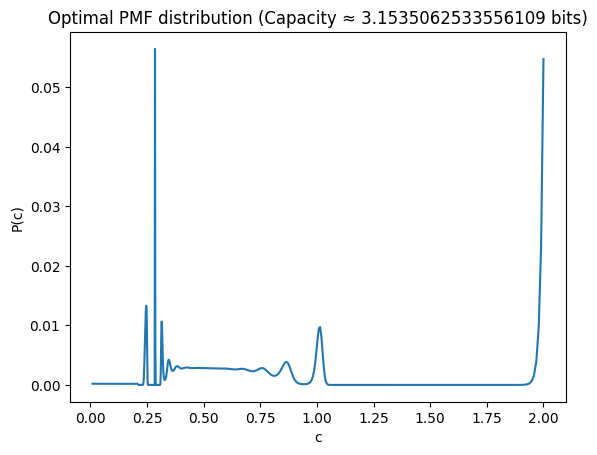

In [12]:
plt.plot(c_vals, p_opt)
#plt.xscale('log')
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal PMF distribution (Capacity ≈ {I:.16f} bits)")
plt.show()

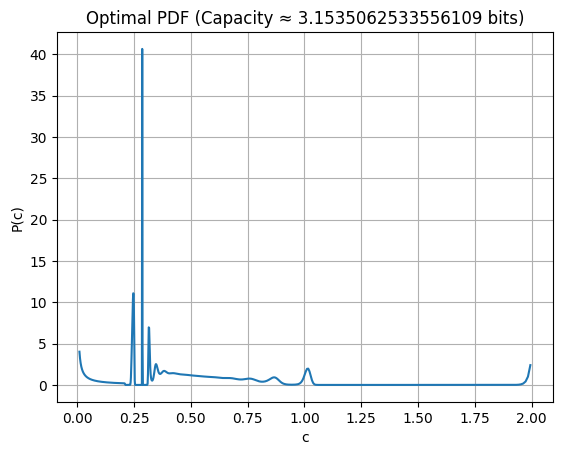

In [13]:
delta_cs = np.diff(c_vals)

p_pd = p_opt[:-1]/delta_cs

c_mids = (c_vals[:-1] + c_vals[1:]) / 2

from scipy.integrate import simpson

# normalize p_pd
norm_factor = simpson(p_pd, c_mids)
p_pd /= norm_factor

# already normalizing Jeffreys
# Jp_values /= simpson(Jp_values, c_mids)

plt.plot(c_mids, p_pd)
#plt.xscale('log')
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal PDF (Capacity ≈ {I:.16f} bits)")
plt.grid(True)
plt.show()

In [14]:
# Checking for Normalization

from scipy.integrate import simpson

k = simpson(p_pd, c_mids)
k

np.float64(1.0)

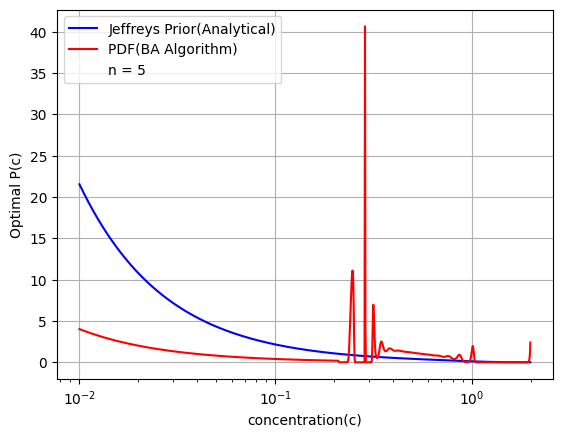

In [15]:
# Computing Jeffreys Prior & checking if it matches the BA Optimal Input Distribution

Jp_values = []
for c in c_mids:
    Jp = (n * c**(n - 1) * K**n) / ((K**n + c**n)**2*noise(c))
    Jp_values.append(Jp)

Jp_values = np.array(Jp_values)
Jp_values /= simpson(Jp_values, c_mids)



plt.plot(c_mids, Jp_values,color='blue', label="Jeffreys Prior(Analytical)")
plt.plot(c_mids, p_pd, color='red', label="PDF(BA Algorithm)")
plt.plot([], [], ' ', label="n = 5")
plt.xscale('log')
plt.xlabel("concentration(c)")
plt.ylabel("Optimal P(c)")
#plt.xlim(2e-1, 4e-1)
plt.legend()
plt.grid(True)
plt.show()

# It is not matching because parameters of noise model are random.

In [16]:
# Checking for Normalization

Kl = simpson(Jp_values, c_mids)
Kl

np.float64(1.0)

# **For different Input Dependent Noise Model** (Here, parameters of Noise Model are known)

In [17]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


num_inputs = 1000
num_outputs = 1000


c_vals = np.logspace(-2, np.log10(1), num_inputs)
g_vals = np.linspace(0, 1, num_outputs)


K = 0.1
n = 5.0


a1 = 1e-7
a2 = 1e-8
a3 = 1e-7
a4 = 1e-8


def mean(c):
    return K**n/(c**n + K**n)    # It is a Hill Function.


def md(c):
    return -n*c**(n-1)*K**n/(c**n + K**n)**2   # Derivation of the mean(c).


# Defining the Noise Model


def noise(c):
    h = mean(c)
    hd = md(c)
    sigma_x = a1*c
    sigma_y = a2*h*(1 - h) + a3*h + a4
    sigma = sigma_x*(hd)**2 + sigma_y
    sigma_n = np.sqrt(sigma)
    return sigma_n


# Defining the Channel Transition Matrix


def chantransmat(c_vals, g_vals):
    delta_g = g_vals[1] - g_vals[0]
    Q_kj = np.zeros((num_outputs, num_inputs))
    for j, c in enumerate(c_vals):
        for k, g in enumerate(g_vals):
            h = mean(c)
            Q_kj[k,j] = norm.pdf(g, loc=h, scale=noise(c)) * delta_g
    column_sums = Q_kj.sum(axis=0, keepdims=True)
    column_sums[column_sums < 1e-15] = 1.0  # prevent division by 0
    Q_kj /= column_sums
    return Q_kj


# Applying the Blahut-Arimoto Algorithm


def channelcapacity(Q_kj, tolerance = 1e-3, max_iterations = 100000):

    epsilon = np.finfo(float).tiny

    num_outputs, num_inputs = Q_kj.shape


    p_j = np.full(num_inputs, 1.0 / num_inputs)    #np.full(shape, value)
    p_j /= np.sum(p_j)  # Normalize


    for iteration in range(max_iterations):
        p_k = np.sum(Q_kj * p_j, axis=1)
        p_k = np.maximum(p_k,epsilon)

        Q = np.maximum(Q_kj,epsilon)

        c_k = np.sum(Q * np.log(Q / p_k[:, None]), axis=0)
        c_k = np.clip(c_k, -700, 700)  # Avoid overflow in exp

        c_j = np.exp(c_k)

        I_L = np.log(np.sum(p_j * c_j))
        I_L = I_L/np.log(2)

        I_U = np.log(max(c_j))
        I_U = I_U/np.log(2)


        if iteration % 10 == 0:
            print(f"Iter {iteration}: I_L = {I_L:.4f}, I_U = {I_U:.4f}")

        if abs(I_U - I_L) < tolerance:
            print(f"Converged in {iteration+1} iterations. Channel Capacity = {I_L} bits")
            return I_L, p_j, iteration+1

        log_p_j = np.log(p_j + epsilon)
        log_c_j = c_k  # because c_k = log c_j

        log_p_j += log_c_j
        log_p_j -= np.logaddexp.reduce(log_p_j)  # normalize

        p_j = np.exp(log_p_j)


        if np.any(p_j < epsilon):
            print("Numerical underflow in normalization step")
            return None, None, iteration+1

    print("Did not converge within the maximum number of iterations.")
    return None, None, iteration+1

In [18]:
Q = chantransmat(c_vals, g_vals)
I, p_opt, iters = channelcapacity(Q)

Iter 0: I_L = 8.2742, I_U = 9.9657
Iter 10: I_L = 8.2987, I_U = 8.3732
Iter 20: I_L = 8.3010, I_U = 8.3368
Iter 30: I_L = 8.3015, I_U = 8.3254
Iter 40: I_L = 8.3018, I_U = 8.3197
Iter 50: I_L = 8.3019, I_U = 8.3162
Iter 60: I_L = 8.3020, I_U = 8.3140
Iter 70: I_L = 8.3021, I_U = 8.3123
Iter 80: I_L = 8.3021, I_U = 8.3113
Iter 90: I_L = 8.3022, I_U = 8.3106
Iter 100: I_L = 8.3022, I_U = 8.3100
Iter 110: I_L = 8.3022, I_U = 8.3095
Iter 120: I_L = 8.3023, I_U = 8.3090
Iter 130: I_L = 8.3023, I_U = 8.3086
Iter 140: I_L = 8.3023, I_U = 8.3083
Iter 150: I_L = 8.3023, I_U = 8.3080
Iter 160: I_L = 8.3023, I_U = 8.3077
Iter 170: I_L = 8.3023, I_U = 8.3075
Iter 180: I_L = 8.3023, I_U = 8.3073
Iter 190: I_L = 8.3023, I_U = 8.3071
Iter 200: I_L = 8.3023, I_U = 8.3069
Iter 210: I_L = 8.3024, I_U = 8.3067
Iter 220: I_L = 8.3024, I_U = 8.3066
Iter 230: I_L = 8.3024, I_U = 8.3064
Iter 240: I_L = 8.3024, I_U = 8.3063
Iter 250: I_L = 8.3024, I_U = 8.3062
Iter 260: I_L = 8.3024, I_U = 8.3061
Iter 270: I_

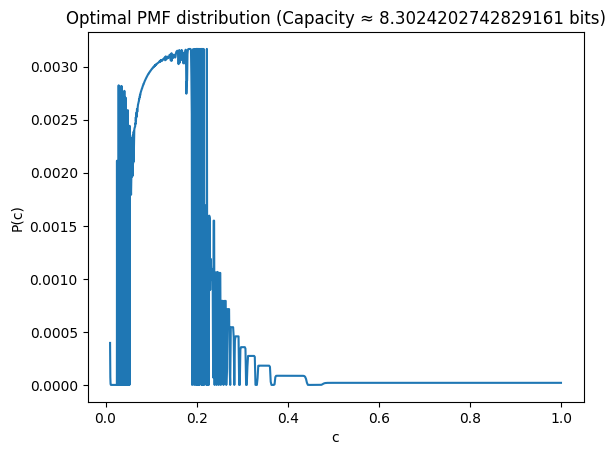

In [19]:
plt.plot(c_vals, p_opt)
#plt.xscale('log')
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal PMF distribution (Capacity ≈ {I:.16f} bits)")
plt.show()

# Smoothing it using Gaussian Filtering

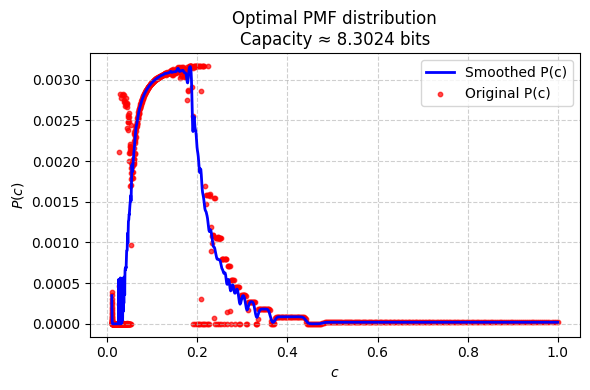

In [20]:
from scipy.ndimage import gaussian_filter1d

# Assume c_vals and p_opt already defined
# Example: c_vals = np.linspace(0, 1, 50); p_opt = np.random.rand(50)

# Smooth p_opt with Gaussian filter
sigma = 2  # adjust this for more/less smoothing
p_smooth = gaussian_filter1d(p_opt, sigma)

plt.figure(figsize=(6,4))
plt.plot(c_vals, p_smooth, color='blue', linewidth=2, label='Smoothed P(c)')
plt.scatter(c_vals, p_opt, color='red', s=10, alpha=0.7, label='Original P(c)')  # optional

plt.xlabel(r"$c$")
plt.ylabel(r"$P(c)$")
plt.title(f"Optimal PMF distribution\nCapacity ≈ {I:.4f} bits")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# Smoothing it using Nadaraya Watson Estimator

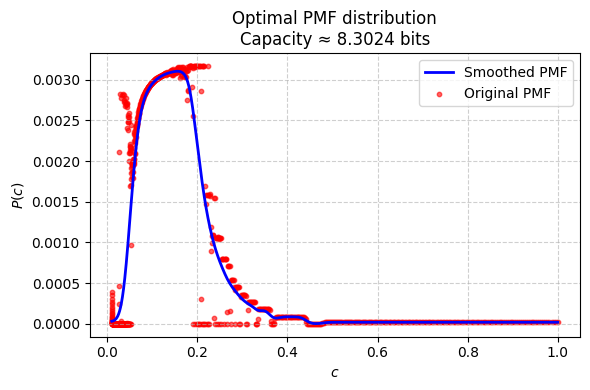

In [21]:
import numpy as np
import matplotlib.pyplot as plt

def nadaraya_watson(x_query, x_train, y_train, bandwidth):
    """
    Nadaraya-Watson kernel regression estimator.
    """
    weights = np.exp(-0.5 * ((x_query[:, None] - x_train[None, :]) / bandwidth)**2)
    weights /= np.sum(weights, axis=1, keepdims=True)
    y_smooth = weights @ y_train
    return y_smooth

# smooth PMF
bandwidth = 0.01  # tune this value
p_opt_smooth = nadaraya_watson(c_vals, c_vals, p_opt, bandwidth)

plt.figure(figsize=(6,4))
plt.plot(c_vals, p_opt_smooth, color='blue', linewidth=2, label="Smoothed PMF")
plt.scatter(c_vals, p_opt, color='red', s=10, alpha=0.6, label="Original PMF")

plt.xlabel(r"$c$")
plt.ylabel(r"$P(c)$")
plt.title(f"Optimal PMF distribution\nCapacity ≈ {I:.4f} bits")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

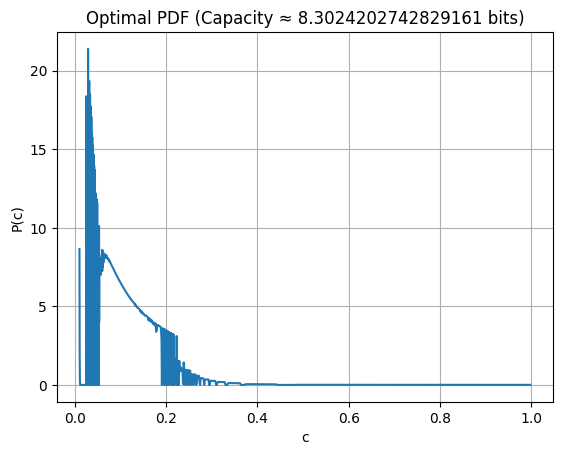

In [22]:
# Converting PMF to PDF

delta_cs = np.diff(c_vals)

p_pd = p_opt[:-1]/delta_cs

c_mids = (c_vals[:-1] + c_vals[1:]) / 2

from scipy.integrate import simpson

# normalize p_pd
norm_factor = simpson(p_pd, c_mids)
p_pd /= norm_factor

# already normalizing Jeffreys
# Jp_values /= simpson(Jp_values, c_mids)

plt.plot(c_mids, p_pd)
#plt.xscale('log')
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal PDF (Capacity ≈ {I:.16f} bits)")
plt.grid(True)
plt.show()

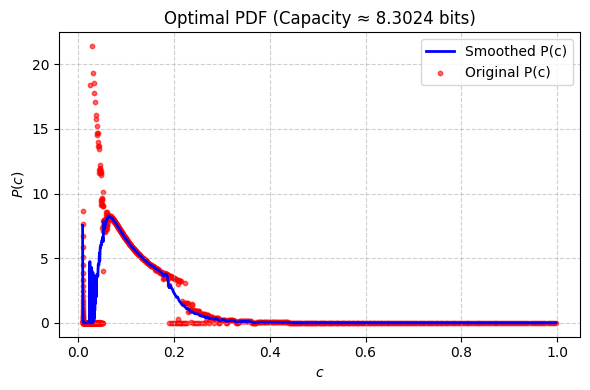

In [23]:
from scipy.ndimage import gaussian_filter1d

# Smooth p_pd
sigma = 2  # tune this
p_pd_smooth = gaussian_filter1d(p_pd, sigma)

plt.figure(figsize=(6,4))
plt.plot(c_mids, p_pd_smooth, color='blue', linewidth=2, label='Smoothed P(c)')
plt.scatter(c_mids, p_pd, color='red', s=10, alpha=0.6, label='Original P(c)')  # optional

plt.xlabel(r"$c$")
plt.ylabel(r"$P(c)$")
plt.title(f"Optimal PDF (Capacity ≈ {I:.4f} bits)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

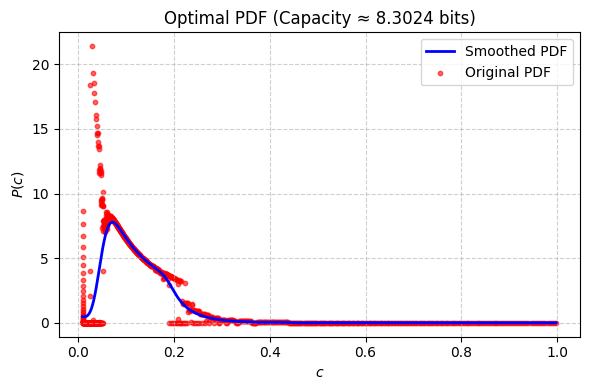

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

def nadaraya_watson(x_query, x_train, y_train, bandwidth):
    """
    Nadaraya-Watson kernel regression estimator.
    """
    weights = np.exp(-0.5 * ((x_query[:, None] - x_train[None, :]) / bandwidth)**2)
    weights /= np.sum(weights, axis=1, keepdims=True)
    y_smooth = weights @ y_train
    return y_smooth

# compute PDF
delta_cs = np.diff(c_vals)
p_pd = p_opt[:-1] / delta_cs
c_mids = (c_vals[:-1] + c_vals[1:]) / 2

# normalize
norm_factor = simpson(p_pd, c_mids)
p_pd /= norm_factor

# smooth PDF using NW estimator
bandwidth = 0.01  # adjust as needed
p_pd_smooth = nadaraya_watson(c_mids, c_mids, p_pd, bandwidth)

plt.figure(figsize=(6,4))
plt.plot(c_mids, p_pd_smooth, color='blue', linewidth=2, label="Smoothed PDF")
plt.scatter(c_mids, p_pd, color='red', s=10, alpha=0.6, label="Original PDF")

plt.xlabel(r"$c$")
plt.ylabel(r"$P(c)$")
plt.title(f"Optimal PDF (Capacity ≈ {I:.4f} bits)")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [25]:
#Checking for Normalization

from scipy.integrate import simpson

k = simpson(p_pd, c_mids)
k

np.float64(0.9999999999999999)

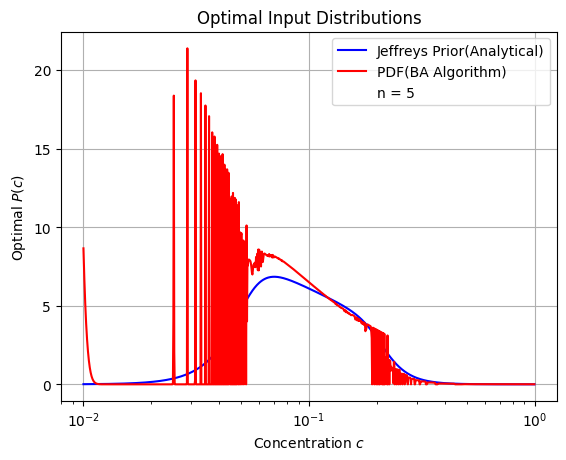

In [26]:
# Computing Jeffreys Prior and checking if its matching with BA Optimal Input Distribution

Jp_values = []
for c in c_mids:
    Jp = md(c)/noise(c)
    Jp_values.append(Jp)

Jp_values = np.array(Jp_values)
Jp_values /= simpson(Jp_values, c_mids)



plt.plot(c_mids, Jp_values,color='blue', label="Jeffreys Prior(Analytical)")
plt.plot(c_mids, p_pd, color='red', label="PDF(BA Algorithm)")
plt.plot([], [], ' ', label="n = 5")
plt.title("Optimal Input Distributions")
plt.xscale('log')
plt.xlabel(r"Concentration $c$")
plt.ylabel(r"Optimal $P(c)$")
#plt.xlim(1e-1, 2)
plt.legend()
plt.grid(True)
plt.show()

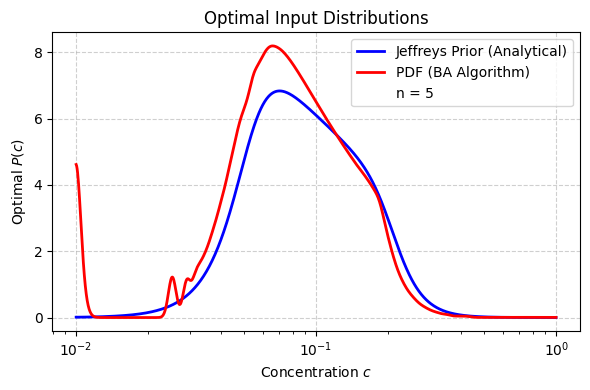

In [27]:
from scipy.ndimage import gaussian_filter1d

# Smooth both curves
sigma = 8  # tune smoothing as needed
Jp_smooth = gaussian_filter1d(Jp_values, sigma)
p_pd_smooth = gaussian_filter1d(p_pd, sigma)

plt.figure(figsize=(6,4))

plt.plot(c_mids, Jp_smooth, color='blue', linewidth=2, label="Jeffreys Prior (Analytical)")
plt.plot(c_mids, p_pd_smooth, color='red', linewidth=2, label="PDF (BA Algorithm)")
plt.plot([], [], ' ', label="n = 5")  # dummy entry for legend

plt.xscale('log')
plt.xlabel(r"Concentration $c$")
plt.ylabel(r"Optimal $P(c)$")
plt.title("Optimal Input Distributions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

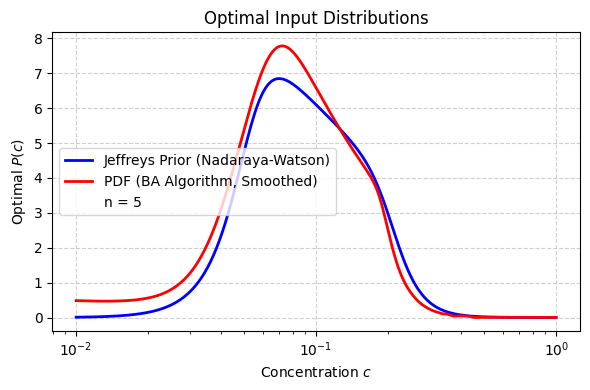

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import simpson

def nadaraya_watson(x_query, x_train, y_train, bandwidth):
    """
    Nadaraya-Watson kernel regression estimator at points x_query
    """
    weights = np.exp(-0.5 * ((x_query[:, None] - x_train[None, :]) / bandwidth)**2)
    weights /= np.sum(weights, axis=1, keepdims=True)
    y_smooth = weights @ y_train
    return y_smooth

# Compute Jp_values
Jp_values = []
for c in c_mids:
    Jp = md(c) / noise(c)
    Jp_values.append(Jp)

Jp_values = np.array(Jp_values)

# Normalize Jp_values
Jp_values /= simpson(Jp_values, c_mids)

# Smooth Jp_values
# bandwidth_jp = 0.01  # adjust as needed
# Jp_smooth = nadaraya_watson(c_mids, c_mids, Jp_values, bandwidth_jp)

# Smooth p_pd
bandwidth_pd = 0.01  # can use same or different bandwidth
p_pd_smooth = nadaraya_watson(c_mids, c_mids, p_pd, bandwidth_pd)

plt.figure(figsize=(6,4))
plt.plot(c_mids, Jp_values, color='blue', linewidth=2, label="Jeffreys Prior (Nadaraya-Watson)")
plt.plot(c_mids, p_pd_smooth, color='red', linewidth=2, label="PDF (BA Algorithm, Smoothed)")
plt.plot([], [], ' ', label="n = 5")

plt.xscale('log')
plt.xlabel(r"Concentration $c$")
plt.ylabel(r"Optimal $P(c)$")
plt.title("Optimal Input Distributions")
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

In [29]:
Jp_values

array([9.46422213e-03, 9.64034925e-03, 9.81975397e-03, 1.00024973e-02,
       1.01886413e-02, 1.03782493e-02, 1.05713858e-02, 1.07681164e-02,
       1.09685079e-02, 1.11726286e-02, 1.13805478e-02, 1.15923362e-02,
       1.18080657e-02, 1.20278098e-02, 1.22516431e-02, 1.24796417e-02,
       1.27118830e-02, 1.29484462e-02, 1.31894115e-02, 1.34348610e-02,
       1.36848779e-02, 1.39395474e-02, 1.41989559e-02, 1.44631917e-02,
       1.47323446e-02, 1.50065060e-02, 1.52857692e-02, 1.55702291e-02,
       1.58599824e-02, 1.61551276e-02, 1.64557649e-02, 1.67619967e-02,
       1.70739269e-02, 1.73916616e-02, 1.77153088e-02, 1.80449785e-02,
       1.83807828e-02, 1.87228358e-02, 1.90712537e-02, 1.94261551e-02,
       1.97876604e-02, 2.01558926e-02, 2.05309768e-02, 2.09130405e-02,
       2.13022136e-02, 2.16986283e-02, 2.21024194e-02, 2.25137240e-02,
       2.29326820e-02, 2.33594358e-02, 2.37941304e-02, 2.42369134e-02,
       2.46879355e-02, 2.51473498e-02, 2.56153125e-02, 2.60919827e-02,
      

In [30]:
# Checking for Normalization

Kl = simpson(Jp_values, c_mids)
Kl

np.float64(1.0)

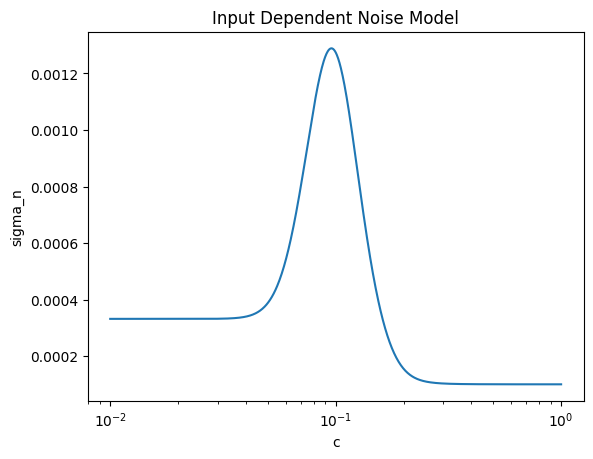

In [31]:
# Plotting for Noise Model vs c

sigma_n_vals = [noise(c) for c in c_vals]
sigma_n_vals = np.array(sigma_n_vals)

plt.plot(c_vals,sigma_n_vals)
plt.xscale('log')
plt.xlabel("c")
plt.ylabel("sigma_n")
plt.title(f"Input Dependent Noise Model")
plt.show()

# Calculating Mutual Information for each Case

In [32]:
import pandas as pd

Way to use csv file on colab. File was the graph from a reference paper for which plot digitiser was used to extract its points.

# Paper Name: **Maximal information transmission is compatible with ultrasensitive biological pathways**

In [33]:
from google.colab import files
uploaded = files.upload()

Saving plot-data far better.csv to plot-data far better.csv


In [34]:
f1 = pd.read_csv("plot-data far better.csv")
f1.head()

,x,y
0,0.011068,0.033445
1,0.011644,0.033445
2,0.012407,0.033445
3,0.012970,0.000000
4,0.014175,0.000000


In [35]:
num_samples = 5000

In [36]:
g_csv = f1.iloc[:,0].values
pg_csv = f1.iloc[:,1].values

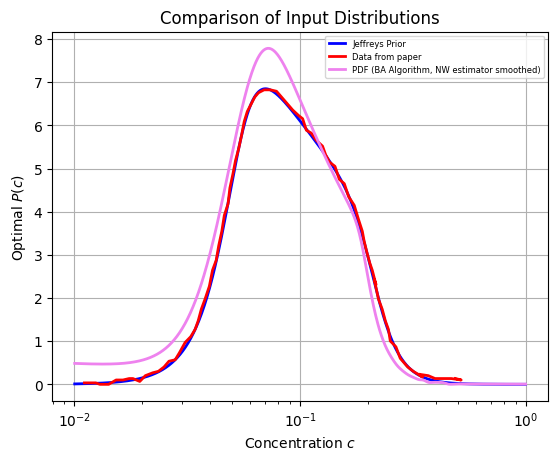

In [37]:
plt.plot(c_mids, Jp_values, color='blue', linewidth=2, label="Jeffreys Prior")
plt.plot(g_csv, pg_csv , color='red', linewidth=2, label="Data from paper")
plt.plot(c_mids, p_pd_smooth, color='violet', linewidth=2, label="PDF (BA Algorithm, NW estimator smoothed)")
plt.xlabel(r"Concentration $c$")
plt.ylabel(r"Optimal $P(c)$")
plt.title("Comparison of Input Distributions")
plt.legend(fontsize=6)
plt.grid(True)
plt.xscale('log')
plt.show()

In [38]:
# ---------------------- Mutual Information ----------------------
from sklearn.feature_selection import mutual_info_regression
def compute_mi(x, y):
    return mutual_info_regression(x.reshape(-1, 1), y, discrete_features=False)[0] / np.log(2)

In [39]:
# ---------------------- Rejection Sampler ----------------------
def rejection_sample(pdf, support, n_samples):
    p_max = np.max(pdf)
    accepted = []
    while len(accepted) < n_samples:
        x = np.random.uniform(support[0], support[-1], 2 * n_samples)
        u = np.random.uniform(0, p_max, 2 * n_samples)
        mask = u < np.interp(x, support, pdf)
        accepted.extend(x[mask])
    return np.array(accepted[:n_samples])


# Draw samples from Jeffreys prior
samples_jeff = rejection_sample(Jp_values, c_mids, num_samples)
outputs_jeff = hill(samples_jeff) + np.random.normal(0, noise(samples_jeff), num_samples)

# Estimate MI for Jeffreys prior
MI_jeff = compute_mi(samples_jeff, outputs_jeff)

In [40]:
MI_jeff

np.float64(8.117248395008428)

In [41]:
# ---------------------- Rejection Sampler ----------------------
def rejection_sample(pdf, support, n_samples):
    p_max = np.max(pdf)
    accepted = []
    while len(accepted) < n_samples:
        x = np.random.uniform(support[0], support[-1], 2 * n_samples)
        u = np.random.uniform(0, p_max, 2 * n_samples)
        mask = u < np.interp(x, support, pdf)
        accepted.extend(x[mask])
    return np.array(accepted[:n_samples])


# Draw samples from Jeffreys prior
samples_jeff = rejection_sample(p_pd_smooth, c_mids, num_samples)
outputs_jeff = hill(samples_jeff) + np.random.normal(0, noise(samples_jeff), num_samples)

# Estimate MI for Jeffreys prior
MI_jeff = compute_mi(samples_jeff, outputs_jeff)

In [42]:
MI_jeff

np.float64(8.141412732037821)

In [43]:
# ---------------------- Rejection Sampler ----------------------
def rejection_sample(pdf, support, n_samples):
    p_max = np.max(pdf)
    accepted = []
    while len(accepted) < n_samples:
        x = np.random.uniform(support[0], support[-1], 2 * n_samples)
        u = np.random.uniform(0, p_max, 2 * n_samples)
        mask = u < np.interp(x, support, pdf)
        accepted.extend(x[mask])
    return np.array(accepted[:n_samples])


# Draw samples from Jeffreys prior
samples_jeff = rejection_sample(pg_csv, g_csv, num_samples)
outputs_jeff = hill(samples_jeff) + np.random.normal(0, noise(samples_jeff), num_samples)

# Estimate MI for Jeffreys prior
MI_jeff = compute_mi(samples_jeff, outputs_jeff)

In [44]:
MI_jeff

np.float64(8.077198178199767)

# **g = c + noise**

In [45]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


mu = 5.0
sigma_n = 0.001

num_inputs = 1000
num_outputs = 1000

c_vals = np.linspace(0, 10, num_inputs)
g_vals = np.linspace(0, 10, num_outputs)
delta_c = c_vals[1] - c_vals[0]


def chantransmat(c_vals, g_vals, sigma_n):
    delta_g = g_vals[1] - g_vals[0]
    Q_kj = np.zeros((len(g_vals), len(c_vals)))
    for j, c in enumerate(c_vals):
        for k, g in enumerate(g_vals):
            Q_kj[k,j] = norm.pdf(g, loc=c, scale=sigma_n) * delta_g
    column_sums = Q_kj.sum(axis=0, keepdims=True)
    column_sums[column_sums < 1e-15] = 1.0  # prevent division by 0
    Q_kj /= column_sums
    return Q_kj



def channelcapacity(Q_kj, tolerance = 1e-2, max_iterations = 10000):

    epsilon = np.finfo(float).tiny

    num_outputs, num_inputs = Q_kj.shape


    p_j = np.full(num_inputs, 1.0 / num_inputs)    #np.full(shape, value)
    p_j /= np.sum(p_j)  # Normalize


    for iteration in range(max_iterations):
        p_k = np.maximum(np.sum(p_j * Q_kj, axis=1),epsilon)

        Q = np.maximum(Q_kj,epsilon)

        c_k = np.sum(Q * np.log(Q / p_k[:, None]), axis=0)
        c_k = np.clip(c_k, -700, 700)  # Avoid overflow in exp

        c_j = np.exp(c_k)

        I_L = np.log(p_j @ c_j)
        I_L = I_L/np.log(2)

        I_U = np.log(max(c_j))
        I_U = I_U/np.log(2)

        if iteration % 10 == 0:
            print(f"Iter {iteration}: I_L = {I_L:.4f}, I_U = {I_U:.4f}")

        if abs(I_U - I_L) < tolerance:
            print(f"Converged in {iteration+1} iterations. Channel Capacity = {I_L} bits")
            return I_L, p_j, iteration+1

        p_j = p_j * c_j
        p_j /= np.sum(p_j)

        if np.any(p_j < epsilon):
            print("Numerical underflow in normalization step")
            return I_L, p_j, iteration+1

    print("Did not converge within the maximum number of iterations.")
    return I_L, p_j, iteration+1

In [46]:
Q = chantransmat(c_vals, g_vals, sigma_n)
I, p_opt, iters = channelcapacity(Q)

Iter 0: I_L = 9.9658, I_U = 9.9658
Converged in 1 iterations. Channel Capacity = 9.965784284662087 bits


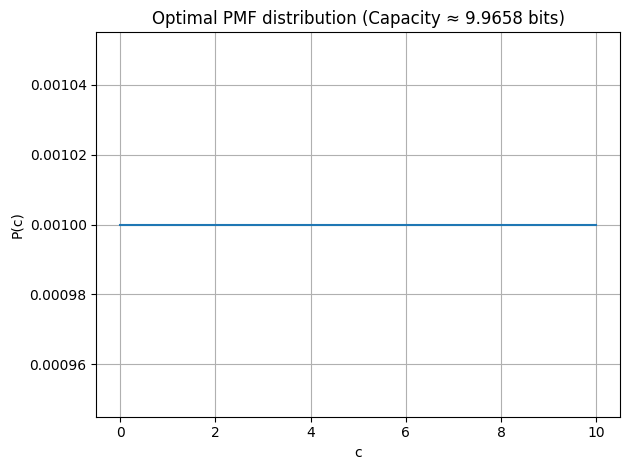

In [47]:
plt.plot(c_vals, p_opt)
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal PMF distribution (Capacity ≈ {I:.4f} bits)")
plt.grid(True)
plt.tight_layout()
plt.show()

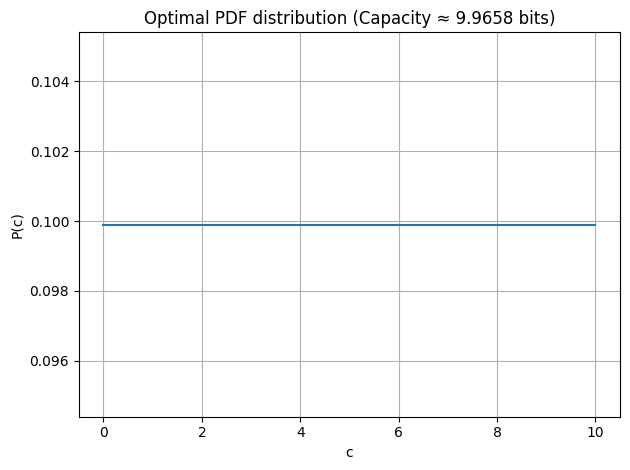

In [48]:
p_pdfa = p_opt/delta_c
plt.plot(c_vals, p_pdfa)
plt.xlabel("c")
plt.ylabel("P(c)")
plt.title(f"Optimal PDF distribution (Capacity ≈ {I:.4f} bits)")
plt.grid(True)
plt.tight_layout()
plt.show()

# **Verifying the code for a Binary Symmetric Channel**

Iter 0: I_L = 1.0000, I_U = 6.6439
Converged in 2 iterations. Channel Capacity = 0.9999999999999512 bits
Iter 0: I_L = 0.5356, I_U = 5.5129
Converged in 4 iterations. Channel Capacity = 0.9185379613029041 bits
Iter 0: I_L = 0.3506, I_U = 4.8246
Converged in 5 iterations. Channel Capacity = 0.857426663264072 bits
Iter 0: I_L = 0.2521, I_U = 4.3196
Converged in 6 iterations. Channel Capacity = 0.8040907265724295 bits
Iter 0: I_L = 0.1916, I_U = 3.9174
Converged in 6 iterations. Channel Capacity = 0.7558583116430663 bits
Iter 0: I_L = 0.1512, I_U = 3.5814
Converged in 7 iterations. Channel Capacity = 0.7114614710021615 bits
Iter 0: I_L = 0.1224, I_U = 3.2922
Converged in 8 iterations. Channel Capacity = 0.6701539232508446 bits
Iter 0: I_L = 0.1012, I_U = 3.0380
Converged in 8 iterations. Channel Capacity = 0.6314431722680106 bits
Iter 0: I_L = 0.0849, I_U = 2.8110
Converged in 9 iterations. Channel Capacity = 0.5949798422934086 bits
Iter 0: I_L = 0.0721, I_U = 2.6061
Converged in 9 iterat

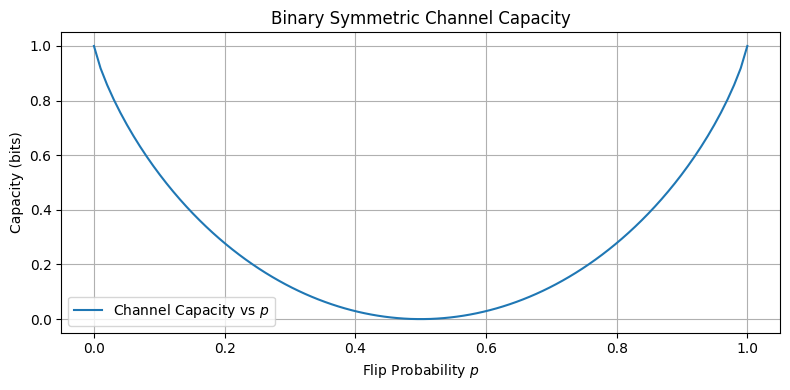

In [49]:
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt


mu = 5.0
sigma_n = 2.0

num_inputs = 1000
num_outputs = 1000

c_vals = np.linspace(0, mu + 4*sigma_n, num_inputs)
g_vals = np.linspace(0, mu + 4*sigma_n, num_outputs)


# def chantransmat(c_vals, g_vals, sigma_n):
#     # delta_g = g_vals[1] - g_vals[0]
#     # Q_kj = np.zeros((num_outputs, num_inputs))
#     # for j, c in enumerate(c_vals):
#     #     for k, g in enumerate(g_vals):
#     #         Q_kj[k,j] = norm.pdf(g, loc=c, scale=sigma_n) * delta_g
#     # column_sums = Q_kj.sum(axis=0, keepdims=True)
#     # column_sums[column_sums < 1e-15] = 1.0  # prevent division by 0
#     # Q_kj /= column_sums
#
#
#     return Q_kj


def channelcapacity(Q_kj, tolerance = 1e-3, max_iterations = 100000):

    epsilon = 1e-15

    num_outputs, num_inputs = Q_kj.shape


    p_j = np.array([0.99,0.01])   #np.full(shape, value)
    p_j /= np.sum(p_j)  # Normalize


    for iteration in range(max_iterations):
        p_k = np.maximum(Q_kj @ p_j,epsilon)

        Q = np.maximum(Q_kj,epsilon)

        c_k = np.sum(Q * np.log(Q / p_k[:, None]), axis=0)
        c_k = np.clip(c_k, -700, 700)  # Avoid overflow in exp

        c_j = np.exp(c_k)

        I_L = np.log(p_j @ c_j)
        I_L = I_L/np.log(2)

        I_U = np.log(np.max(c_j))
        I_U = I_U/np.log(2)

        if iteration % 10 == 0:
            print(f"Iter {iteration}: I_L = {I_L:.4f}, I_U = {I_U:.4f}")

        if abs(I_U - I_L) < tolerance:
            print(f"Converged in {iteration+1} iterations. Channel Capacity = {I_L} bits")
            return I_L, p_j

        numerator = p_j * c_j
        denominator = np.sum(numerator)
        p_j = numerator/denominator

        if denominator < epsilon:
            print("Numerical underflow in normalization step")
            return None, None, iteration+1

    print("Did not converge within the maximum number of iterations.")
    return None, None, iteration+1


CP = []
PJ = []
p_vals = np.linspace(0,1,100)
for p in p_vals:
    Q_kj = np.array([[p,1-p],[1-p,p]])
    cc,prob = channelcapacity(Q_kj)
    CP.append(cc)
    PJ.append(prob)


plt.figure(figsize=(8, 4))
plt.plot(p_vals, CP, label='Channel Capacity vs $p$')
plt.xlabel('Flip Probability $p$')
plt.ylabel('Capacity (bits)')
plt.title('Binary Symmetric Channel Capacity')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# **Linear Noise Approximation**

It is used when noise in a system is **small** compared to the signal. Instead of dealing with comlex non linear relationships, we approximate them with simple linear expressions.

We know that $I(c;g) = \frac{1}{2} log_{2} (1 + \frac{\sigma_c^{2}}{\sigma^2})$. Here, $\frac{\sigma_c^{2}}{\sigma^2}$ is defined as signal-to-noise ratio(SNR).

Applying First Order Taylor Approximation, $ln(1+x)$ $\approx$ $x$

so, $I(c;g) = \frac{\frac{\sigma_c^{2}}{\sigma^2}}{2ln2} = \frac{SNR}{2ln2}$

Channel Capacity($C$) $\approx$ $I(c;g)$ = $\frac{\frac{\sigma_c^{2}}{\sigma^2}}{2ln2} = \frac{SNR}{2ln2}$ in Linear Noise Approximation.

In [50]:
import numpy as np
import math

# Parameters
sigma_c = 1.0  # signal std
sigma = 1.0    # noise std
mu_c = 0.0     # signal mean
N = 100000     # samples

# Generate data
np.random.seed(0)
c = np.random.normal(mu_c, sigma_c, N)
g = c + np.random.normal(0, sigma, N)

# Theoretical mutual information
SNR = sigma_c**2 / sigma**2
I_theory = 0.5 * np.log2(1 + SNR)

# Linear Noise Approximation
I_lna = SNR / (2 * np.log(2))  # log base e, so divide by ln(2)

# Print comparison
print(f"SNR: {SNR:.4f}")
print(f"Theoretical Mutual Information: {I_theory:.4f} bits")
print(f"Linear Noise Approximation:     {I_lna:.4f} bits")
print(f"Difference:                     {abs(I_theory - I_lna):.4e} bits")

SNR: 1.0000
Theoretical Mutual Information: 0.5000 bits
Linear Noise Approximation:     0.7213 bits
Difference:                     2.2135e-01 bits


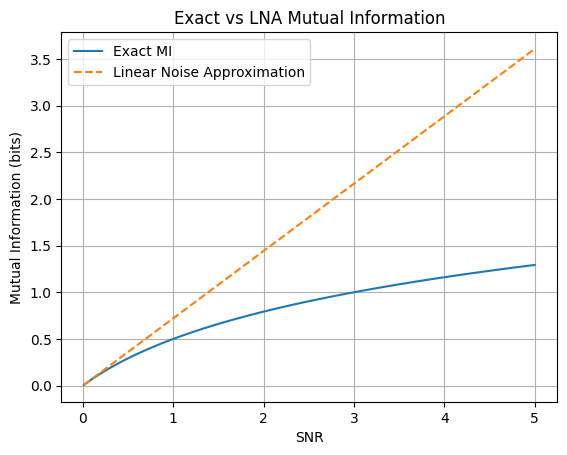

In [51]:
import matplotlib.pyplot as plt

snrs = np.linspace(0.01, 5, 100)
I_exact = 0.5 * np.log2(1 + snrs)
I_lna_all = snrs / (2 * np.log(2))

plt.plot(snrs, I_exact, label='Exact MI')
plt.plot(snrs, I_lna_all, '--', label='Linear Noise Approximation')
plt.xlabel('SNR')
plt.ylabel('Mutual Information (bits)')
plt.legend()
plt.grid(True)
plt.title('Exact vs LNA Mutual Information')
plt.show()

Channel Capacity code would be same for the upper cases as it is done for small noise(0.002).

# **In Rob Phillips code for multi-promoter model, We get channel capacity as 1.09 bits and not 1.81 bits.**

# **Average Information Rate($R(c;g)$)**

To assess information transmission in systems with continuous-time signals, the **average information rate** is introduced, which measures the number of bits transmitted per unit time. It is defined as

$R(c; g) = \lim_{T \to \infty} \frac{I(c; g)}{T}$

and under the assumption of stationarity and Gaussianity, it can be written in the frequency domain as

$R(c; g) = \frac{1}{4\pi} \int_{-\infty}^{\infty} d\omega \, \log_2 \left(1 + \frac{\Sigma(\omega)}{N(\omega)} \right)$

where $\Sigma(\omega)$ is the power spectral density of the signal and $N(\omega)$ is that of the noise. This expression is directly analogous to the Shannon capacity for a continuous Gaussian channel and assumes no frequency mixing (i.e., each input frequency affects the output at the same frequency).

The average information rate $R(\omega)$ represents the fundamental limit of information flow through communication channels. For continuous signals, it takes the form:

\begin{equation}
R(\omega) = \int_{-\infty}^{\infty} \log_2\left(1 + \frac{S_{xx}(\omega)}{S_{nn}(\omega)}\right) d\omega
\end{equation}

where $S_{xx}(\omega)$ is signal power spectral density and $S_{nn}(\omega)$ is noise power spectral density.

**Physical Significance**

1. It quantifies how efficiently information flows through channels that change over time.

2. The frequency-domain representation reveals how different frequency components contribute unequally to information transmission.

# **Constrained Channel**

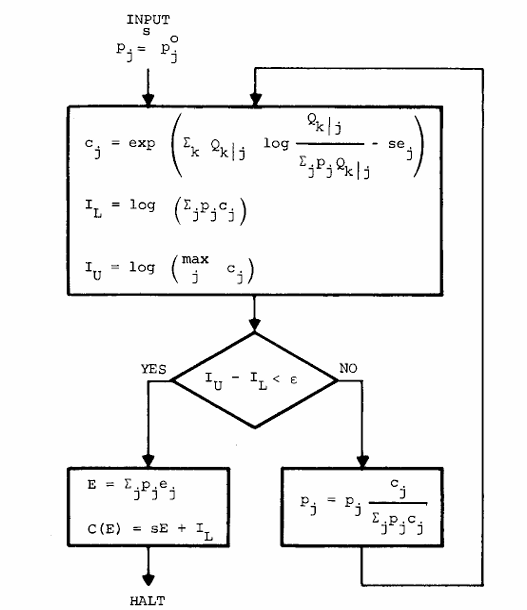


Here, s is lagrange multiplier and non-negative.